In [1]:
#1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
# 2. Read the data file and show the data
df = pd.read_csv('/Users/mac/Documents/HK6/IS403.PTDL KD/đồ án main/csv/Data_stock_HVN_VN.csv')
df

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1240,2024-02-23,12650,12750,12500,12550,469600
1241,2024-02-26,12550,12850,12500,12800,627300
1242,2024-02-27,12800,12850,11950,12700,293900
1243,2024-02-28,12900,12900,12650,12650,494700


In [5]:
# 3. Divide the train:test at a ratio of 9:1
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing
train_size = int(0.9 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [6]:
# 4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [10]:
# 6. The process of creating index predict the next 7 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Create an array of 7 consecutive integers starting from last_index
x_next_7_days = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Predict the closing prices for the next 7 days
y_next_7_days = model.predict(x_next_7_days)

# Print the predicted closing prices for the next 7 days
print('Predicted closing prices for the next 7 days:')
print(y_next_7_days)

Predicted closing prices for the next 7 days:
[10835.86893577 10820.74640817 10805.62388057 10790.50135297
 10775.37882536 10760.25629776 10745.13377016]


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np

# Calculate RMSE 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MLSE 
msle_test = mean_squared_log_error(y_test, y_pred)


print("RMSE:", rmse_test)
print("MAPE:", mape_test, "%")
print("MSLE:", msle_test)

RMSE for test set: 1064.4926619664802
MAPE for test set: 7.981811144511269 %
MSLE for test set: 0.008264753656993286


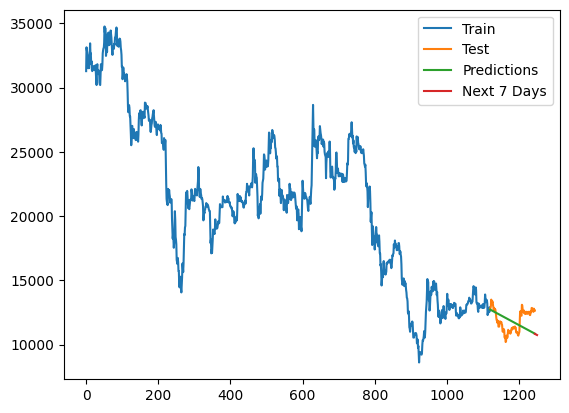

In [16]:
# Draw the graph
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_7_days)
plt.legend(['Train', 'Test', 'Predictions','Next 7 Days'])
plt.show()